In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import unicodedata

In [2]:
df = pd.read_excel("../../crawl_data/data/data_camera.xlsx")

> Số dòng và số cột

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 202 entries, ca to visible_impression_info_amplitude_gift_rule_ids
dtypes: bool(16), float64(47), int64(51), object(88)
memory usage: 147.0+ KB
None


> Xem dữ liệu

10 dòng đầu

In [4]:
print(df.head(10))

          ca            sku  \
0  277854019  8795204295382   
1  277601288  5980799827064   
2  277417151  3367749795649   
3  277015260  7607448837870   
4  276857147  1981200159179   
5  276711006  4656279519859   
6  276376478  9119419940064   
7  275918344  5428330335997   
8  275856061  4317771891651   
9  275257961  4831458302211   

                                                name  \
0                        Đồng hồ đo Áp suất lốp Ô tô   
1  Camera wifi Yoosee Ngoài Trời 20MPX 4 Mắt 3 Mà...   
2  Camera Yoosee Wifi Ngoài Trời 2 Mắt Xem Cùng L...   
3  Pin Dành Cho Máy Ảnh Nikon EN-EL14 1500mAh Cao...   
4  Thẻ Vietmap Live Pro Chính Hãng 2025, cảnh báo...   
5  Camera hành trình 70mai M310 Ghi hình 2K (QHD)...   
6  Camera IP Wifi EZVIZ C6N Pro 2K (3MP) - Phiên ...   
7  Camera wifi Ezviz ngoài trời H8C PRO 3MP phát ...   
8  Bộ dây đeo ngực 5 chi tiết cho máy quay hành đ...   
9  Camera Wifi Ngoài trời TP-Link Tapo C520WS - Đ...   

                                         

10 dòng cuối

In [5]:
df.tail(10)

,ca,sku,name,url_key,url_path,type,author_name,book_cover,brand_name,short_description,...,badges_new_6_arr_text_0_value,badges_new_6_code,badges_new_6_placement,badges_new_6_text_color,badges_new_6_type,badges_new_4_images_0_image_height,badges_new_4_images_0_image_url,badges_new_4_images_0_image_width,badges_new_5_arr_text_1_value,visible_impression_info_amplitude_gift_rule_ids
90,274847176,8945533082428,"Camera Ngoài Trời NetCAM STD34, Quay Quét 360 ...",camera-ngoai-troi-netcam-std33-quay-quet-360-d...,camera-ngoai-troi-netcam-std33-quay-quet-360-d...,NaN,NaN,NaN,NetCAM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,274728425,6963184400530,Thẻ nhớ SD Sandisk Ultra GN3 32GB 100MB/s UHS-...,the-nho-sd-sandisk-ultra-gn3-32gb-100mb-s-uhs-...,the-nho-sd-sandisk-ultra-gn3-32gb-100mb-s-uhs-...,NaN,NaN,NaN,SanDisk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,274724794,1562116351415,Camera Năng Lượng Mặt Trời 4G Không Dây NetCAM...,camera-nang-luong-mat-troi-4g-khong-day-netcam...,camera-nang-luong-mat-troi-4g-khong-day-netcam...,NaN,NaN,NaN,NetCAM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,274179036,1814747717561,Camera IP WiFi Yoosee R3 Có 3 Mắt Ngoài Trời X...,camera-ip-wifi-yoosee-r3-co-3-mat-ngoai-troi-x...,camera-ip-wifi-yoosee-r3-co-3-mat-ngoai-troi-x...,NaN,NaN,NaN,Yoosee,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,273026293,4710879586161,Camera Hành Trình Ô Tô 3 Mắt S10 Plus Có WiFi ...,camera-hanh-trinh-fullhd-5-0mpx-s10-plus-ket-n...,camera-hanh-trinh-fullhd-5-0mpx-s10-plus-ket-n...,NaN,NaN,NaN,VIETHAS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,272366633,1438796546787,Camera Wifi TP-Link Tapo C211 Độ Phân Giải 2K ...,camera-wifi-tp-link-tapo-c211-do-phan-giai-2k-...,camera-wifi-tp-link-tapo-c211-do-phan-giai-2k-...,NaN,NaN,NaN,TP-Link,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,271705499,7418450832984,Camera Wifi TP-Link Tapo C212 Độ Phân Giải 2K ...,camera-wifi-tp-link-tapo-c212-do-phan-giai-2k-...,camera-wifi-tp-link-tapo-c212-do-phan-giai-2k-...,NaN,NaN,NaN,TP-Link,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,271248861,4655534616620,Camera Yoosee 2 Mắt Q26D Phiên bản Phóng To 6X...,camera-yoosee-2-mat-blq26d-phien-ban-phong-to-...,camera-yoosee-2-mat-blq26d-phien-ban-phong-to-...,NaN,NaN,NaN,VIETHAS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,263987622,2485093259036,Camera Wifi TP-Link Tapo C200 / C210 Smart IR ...,camera-wifi-tp-link-tapo-c200-c210-smart-ir-fu...,camera-wifi-tp-link-tapo-c200-c210-smart-ir-fu...,NaN,NaN,NaN,TP-Link,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,263588554,7113610197220,Camera Wifi Trong Nhà Xoay 360 IMOU RANGER A2 ...,camera-wifi-trong-nha-xoay-360-imou-ranger-a2-...,camera-wifi-trong-nha-xoay-360-imou-ranger-a2-...,NaN,NaN,NaN,IMOU,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Xem kiểu dữ liệu

In [6]:
print(df.dtypes)

ca                                                   int64
sku                                                  int64
name                                                object
url_key                                             object
url_path                                            object
                                                    ...   
badges_new_4_images_0_image_height                 float64
badges_new_4_images_0_image_url                     object
badges_new_4_images_0_image_width                  float64
badges_new_5_arr_text_1_value                       object
visible_impression_info_amplitude_gift_rule_ids    float64
Length: 202, dtype: object


Xem phân phối chuẩn

In [7]:
print(df.describe())

                 ca           sku  type  author_name  book_cover  \
count  1.000000e+02  1.000000e+02   0.0          0.0         0.0   
mean   2.167786e+08  5.337243e+12   NaN          NaN         NaN   
std    8.626709e+07  2.535559e+12   NaN          NaN         NaN   
min    4.688897e+06  1.073479e+12   NaN          NaN         NaN   
25%    1.872575e+08  3.033007e+12   NaN          NaN         NaN   
50%    2.709771e+08  5.413106e+12   NaN          NaN         NaN   
75%    2.752561e+08  7.431744e+12   NaN          NaN         NaN   
max    2.779654e+08  9.977953e+12   NaN          NaN         NaN   

       short_description         price  list_price      discount  \
count                0.0  1.000000e+02       100.0  1.000000e+02   
mean                 NaN  4.738594e+05         0.0  1.146859e+05   
std                  NaN  3.573190e+05         0.0  2.136567e+05   
min                  NaN  1.100000e+04         0.0  0.000000e+00   
25%                  NaN  2.447748e+05         

> Tỉ lệ giá trị thiếu

In [8]:
print(df.isnull().sum())

ca                                                  0
sku                                                 0
name                                                0
url_key                                             0
url_path                                            0
                                                   ..
badges_new_4_images_0_image_height                 99
badges_new_4_images_0_image_url                    99
badges_new_4_images_0_image_width                  99
badges_new_5_arr_text_1_value                      99
visible_impression_info_amplitude_gift_rule_ids    99
Length: 202, dtype: int64


In [9]:
num_missing_cols = (df.isnull().sum() > 0).sum()
print("Số cột có giá trị thiếu:", num_missing_cols)

Số cột có giá trị thiếu: 102


In [10]:
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]

missing_table = pd.DataFrame({
    "Cột": missing_summary.index,
    "Số lượng thiếu": missing_summary.values,
    "Tỉ lệ thiếu (%)": (missing_summary.values / len(df)) * 100
}).sort_values(by="Số lượng thiếu", ascending=False).reset_index(drop=True)

print(missing_table)

                            Cột  Số lượng thiếu  Tỉ lệ thiếu (%)
0                          type             100            100.0
1                     inventory             100            100.0
2                 advertisement             100            100.0
3    impression_info_0_checksum             100            100.0
4                   author_name             100            100.0
..                          ...             ...              ...
97            badges_new_2_type               3              3.0
98            badges_v3_0_image               1              1.0
99             badges_v3_0_code               1              1.0
100       badges_v3_0_placement               1              1.0
101            badges_v3_0_type               1              1.0

[102 rows x 3 columns]


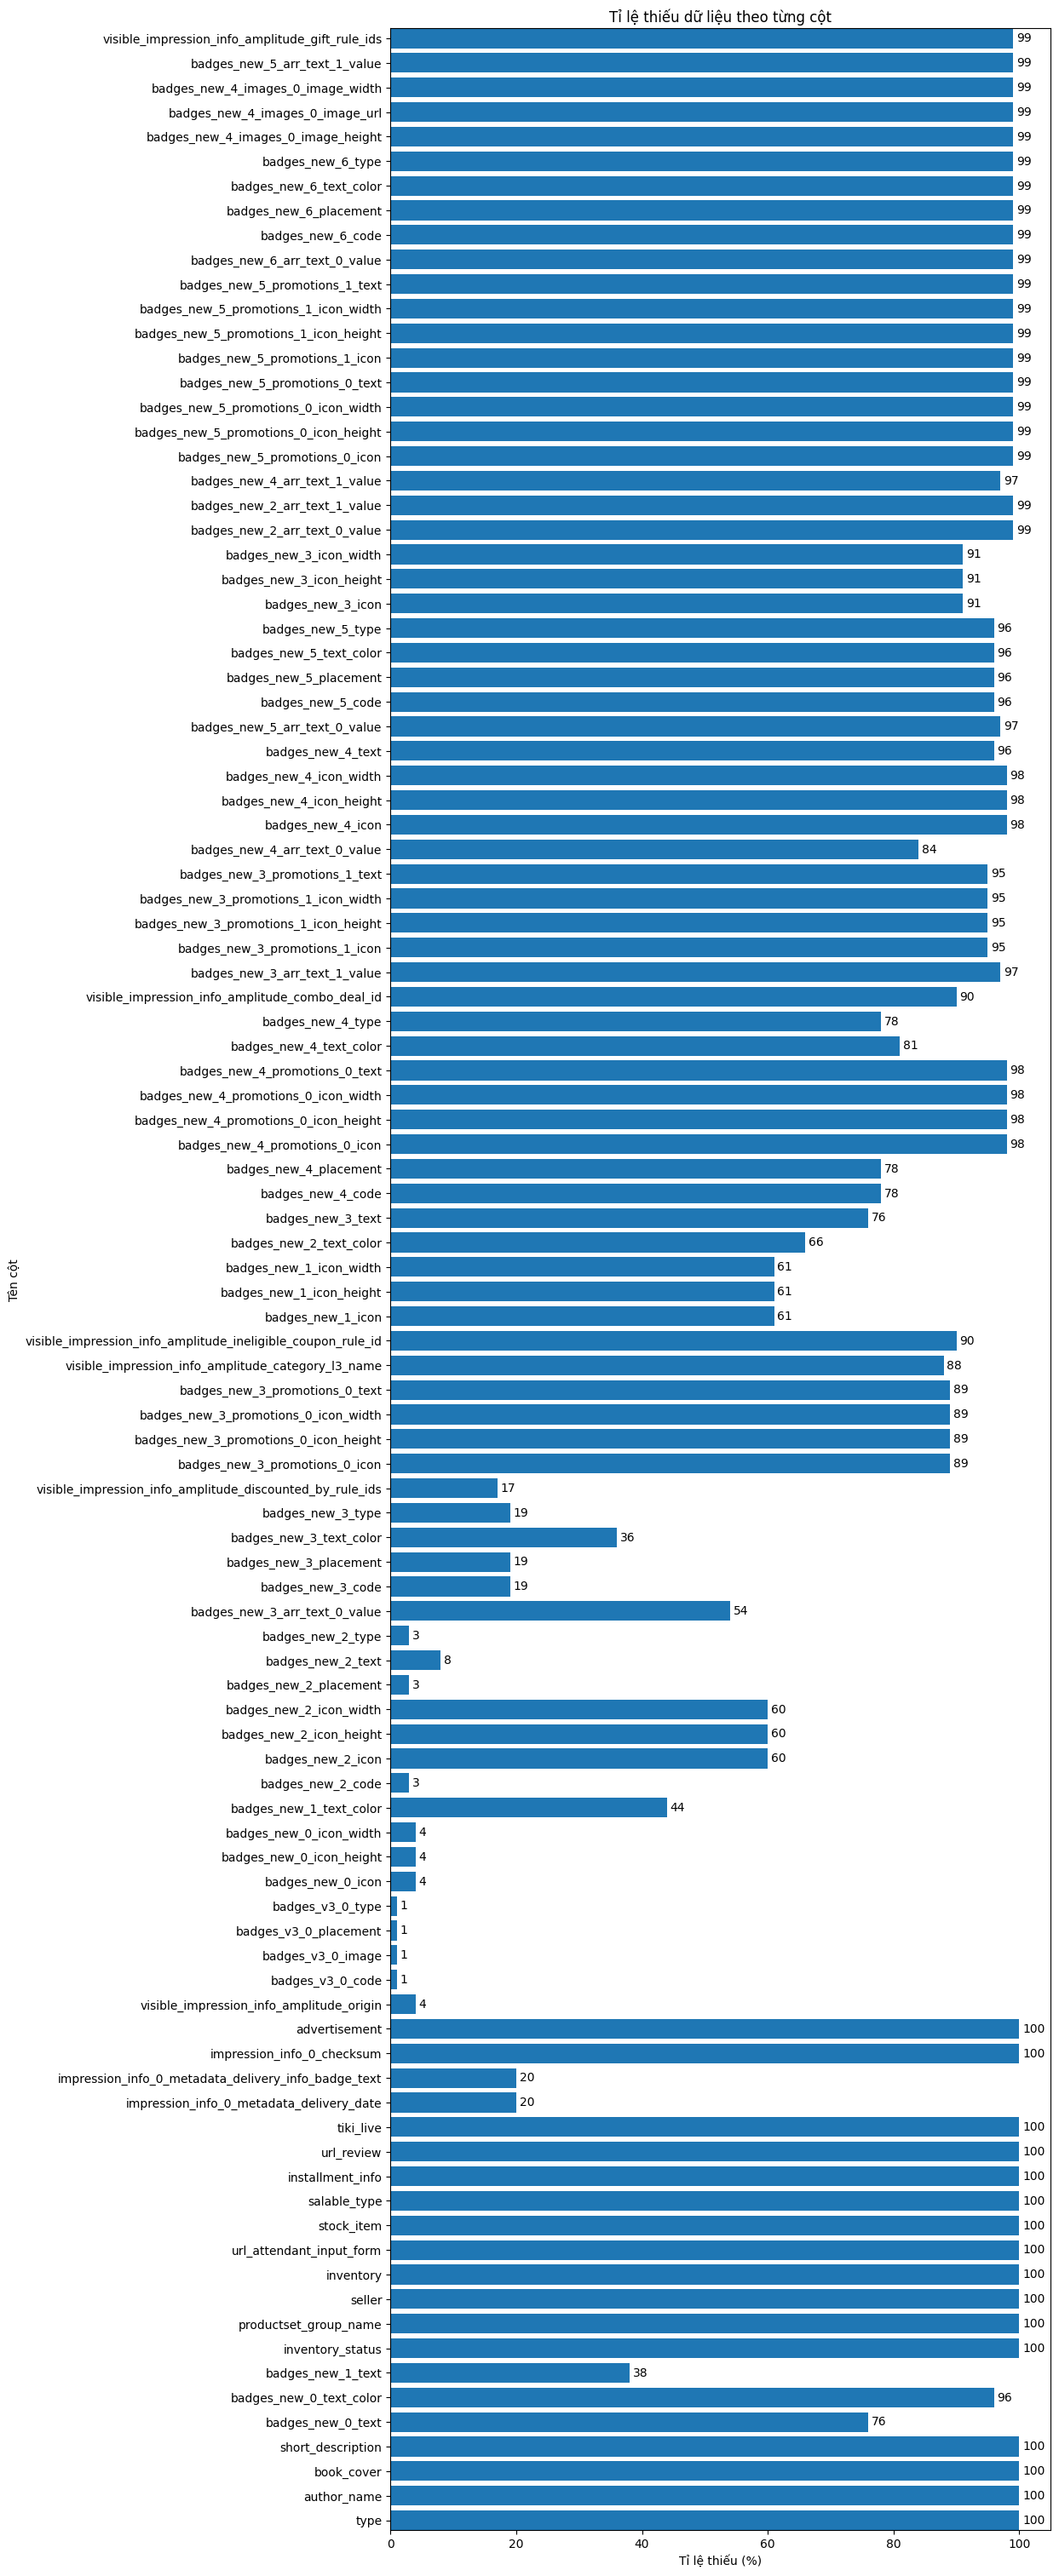

In [11]:
missing_ratio = (missing_summary / len(df)) * 100

plt.figure(figsize=(10, len(missing_ratio) * 0.3))
bars = plt.barh(missing_ratio.index, missing_ratio.values)

plt.xlabel("Tỉ lệ thiếu (%)")
plt.ylabel("Tên cột")
plt.title("Tỉ lệ thiếu dữ liệu theo từng cột")

for bar, val in zip(bars, missing_summary.values):
    plt.text(
        bar.get_width() + 0.5,
        bar.get_y() + bar.get_height()/2,
        str(val),
        va='center'
    )
plt.margins(y=0)
plt.subplots_adjust(top=0.98, bottom=0.02)
plt.show()

# ***CLEANING***

***Bước làm sạch dữ liệu***

Xử lý giá trị thiếu (missing values)

Nếu cột thiếu toàn bộ hoặc >95% thì drop.
Nếu cột quan trọng nhưng thiếu ít → thay thế (mean/median cho số, mode cho categorical).

In [12]:
# Ngưỡng drop cột theo tỷ lệ thiếu
MISSING_COL_THRESHOLD = 0.95  # >95% thiếu thì drop

def strip_accents_lower(s):
    if pd.isna(s): return s
    s = str(s).strip().lower()
    nfkd = unicodedata.normalize("NFKD", s)
    return "".join([c for c in nfkd if not unicodedata.combining(c)])

def to_num(x):
    """Bóc tách số từ chuỗi (ưu tiên VNĐ là số nguyên), lỗi -> NaN."""
    if pd.isna(x): return np.nan
    s = str(x)
    try:
        return float(s)
    except:
        pass
    s = re.sub(r"[^\d.]", "", s)
    if s.count(".") > 1:  # nghi ngờ dấu . là ngăn cách nghìn
        s = s.replace(".", "")
    try:
        return float(s) if s else np.nan
    except:
        return np.nan

print("Kích thước ban đầu:", df.shape)

Kích thước ban đầu: (100, 202)


In [13]:
def parse_price(x):
    """Giữ lại chữ số và chuyển về float; trống -> NaN."""
    if pd.isna(x):
        return np.nan
    s = re.sub(r"[^\d]", "", str(x))
    return float(s) if s else np.nan

def strip_accents_lower(s):
    """Chuẩn hóa text: bỏ dấu, lowercase, strip khoảng trắng."""
    if pd.isna(s):
        return s
    s = str(s).strip().lower()
    nfkd = unicodedata.normalize("NFKD", s)
    return "".join([c for c in nfkd if not unicodedata.combining(c)])

In [14]:
df_clean = df.copy()

In [15]:
# Drop cột có tỷ lệ thiếu > ngưỡng

null_ratio = df_clean.isna().mean()
drop_cols = list(null_ratio[null_ratio > MISSING_COL_THRESHOLD].index)
df_clean = df_clean.drop(columns=drop_cols)
print(f"Đã drop {len(drop_cols)} cột thiếu > {int(MISSING_COL_THRESHOLD*100)}%")
print("Sau drop cột:", df_clean.shape)

Đã drop 52 cột thiếu > 95%
Sau drop cột: (100, 150)


In [16]:
for key_col in ["id","name"]:
    if key_col in df_clean.columns:
        before = len(df_clean)
        df_clean = df_clean[df_clean[key_col].notna()]
        print(f"Loại {before-len(df_clean)} hàng thiếu '{key_col}'")

Loại 0 hàng thiếu 'name'


In [17]:
# Loại trùng lặp theo id (nếu có), nếu không có id thì thử theo (name, brand)
if "id" in df_clean.columns:
    before = len(df_clean)
    df_clean = df_clean.drop_duplicates(subset=["id"])
    print("Drop duplicates theo 'id':", before - len(df_clean))
elif set(["name","brand_name"]).issubset(df_clean.columns):
    before = len(df_clean)
    df_clean = df_clean.drop_duplicates(subset=["name","brand_name"])
    print("Drop duplicates theo (name, brand_name):", before - len(df_clean))

print("Kích thước hiện tại:", df_clean.shape)

Drop duplicates theo (name, brand_name): 1
Kích thước hiện tại: (99, 150)


In [18]:
# Giá: 'price', 'list_price' -> float
for col in ["price", "list_price"]:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].apply(parse_price)
if set(["price","list_price"]).issubset(df_clean.columns):
    df_clean["discount_percent"] = np.where(
        df_clean["list_price"].gt(0) & df_clean["price"].notna(),
        (df_clean["list_price"] - df_clean["price"]) / df_clean["list_price"] * 100.0,
        np.nan
    )

In [19]:
def choose_best_column(frame, candidates):
    avail = [c for c in candidates if c in frame.columns]
    if not avail: return None
    nn = {c: frame[c].notna().sum() for c in avail}
    return max(nn, key=nn.get)

def coalesce(series_list):
    out = None
    for s in series_list:
        if s is None: 
            continue
        out = s if out is None else out.combine_first(s)
    return out

price_candidates      = ["price","final_price","sale_price","deal_price","current_price","best_price"]
list_price_candidates = ["list_price","original_price","price_before_discount","regular_price","old_price","reference_price"]
rate_candidates       = ["discount_rate","discount_percent","discountPercentage","discount_percent_api"]
abs_disc_candidates   = ["discount","discount_amount","price_discount","saved_amount"]

price_col      = choose_best_column(df_clean, price_candidates)
list_price_col = choose_best_column(df_clean, list_price_candidates)
rate_col       = choose_best_column(df_clean, rate_candidates)
abs_col        = choose_best_column(df_clean, abs_disc_candidates)

print("Cột phát hiện:")
print(" - price      :", price_col)
print(" - list_price :", list_price_col)
print(" - rate(%)    :", rate_col)
print(" - discount₫  :", abs_col)

# Ép kiểu số
if price_col:      df_clean["_price_fix"]      = pd.to_numeric(df_clean[price_col].map(to_num), errors="coerce")
if list_price_col: df_clean["_list_price_fix"] = pd.to_numeric(df_clean[list_price_col].map(to_num), errors="coerce")
if rate_col:       df_clean["_rate_fix"]       = pd.to_numeric(df_clean[rate_col].map(to_num), errors="coerce")
if abs_col:        df_clean["_disc_abs_fix"]   = pd.to_numeric(df_clean[abs_col].map(to_num), errors="coerce")

# Ưu tiên 1
dp1 = None
if price_col and list_price_col:
    lp = df_clean["_list_price_fix"]; pr = df_clean["_price_fix"]
    with np.errstate(divide='ignore', invalid='ignore'):
        dp1 = (lp - pr) / lp * 100.0
        dp1 = dp1.where((lp > 0) & pr.notna())

# Ưu tiên 2
dp2 = None
if rate_col:
    r = df_clean["_rate_fix"]
    dp2 = pd.to_numeric(np.where(r <= 1.0, r * 100.0, r), errors="coerce")

# Ưu tiên 3
dp3 = None
if abs_col and list_price_col:
    lp = df_clean["_list_price_fix"]; da = df_clean["_disc_abs_fix"]
    with np.errstate(divide='ignore', invalid='ignore'):
        dp3 = pd.to_numeric(da / lp * 100.0, errors="coerce").where(lp > 0)

# Gộp & làm sạch
dp = coalesce([dp1, pd.Series(dp2) if dp2 is not None else None, dp3])
if dp is not None:
    dp = pd.to_numeric(dp, errors="coerce").clip(-5, 100).round(2)
    df_clean["discount_percent"] = dp
else:
    df_clean["discount_percent"] = np.nan

print("Số dòng có discount_percent:", int(df_clean["discount_percent"].notna().sum()), "/", len(df_clean))


Cột phát hiện:
 - price      : price
 - list_price : list_price
 - rate(%)    : discount_rate
 - discount₫  : discount
Số dòng có discount_percent: 98 / 99


In [20]:
# Chuẩn hóa text cơ bản cho vài cột thông dụng
for col in ["name", "brand_name", "url_key", "url_path"]:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype(str).map(strip_accents_lower)

In [21]:
# Tạo 'brand_clean' rút gọn (chỉ chữ & số)
if "brand_name" in df_clean.columns:
    df_clean["brand_clean"] = df_clean["brand_name"].str.replace(r"[^a-z0-9]+", " ", regex=True).str.strip()

print(df_clean[["price","list_price","discount_percent"]].head(3) if "price" in df_clean.columns else df_clean.head(3))

      price  list_price  discount_percent
0   75000.0         0.0               0.0
1  625000.0         0.0               4.0
2  530000.0         0.0               4.0


Xử lý missing còn lại

Numeric: điền median

Categorical: điền mode

-> Chỉ áp dụng cho các cột KHÔNG phải khóa/id/text quan trọng

In [22]:
from pandas.api.types import is_numeric_dtype

In [23]:
# Cột không nên đụng tới khi fill (nếu tồn tại)
do_not_touch = set([c for c in ["id","sku","url_key","url_path"] if c in df_clean.columns])

num_cols = [c for c in df_clean.columns if is_numeric_dtype(df_clean[c]) and c not in do_not_touch]
cat_cols = [c for c in df_clean.columns if not is_numeric_dtype(df_clean[c]) and c not in do_not_touch]

In [24]:
# Fill numeric bằng median (nếu còn dữ liệu hợp lệ)
for c in num_cols:
    if df_clean[c].isna().any():
        if df_clean[c].notna().any():  # có ít nhất 1 giá trị không NaN
            med = df_clean[c].median(skipna=True)
            df_clean[c] = df_clean[c].fillna(med)
        else:
            print(f"Cột {c} toàn NaN, không thể tính median.")

# Fill categorical bằng mode (nếu có mode hợp lệ)
for c in cat_cols:
    if df_clean[c].isna().any():
        mode_vals = df_clean[c].mode(dropna=True)
        if not mode_vals.empty:
            df_clean[c] = df_clean[c].fillna(mode_vals.iloc[0])
        else:
            print(f"Cột {c} toàn NaN, không thể tính mode.")

print("Đã fill missing cho numeric & categorical (ổn định hơn).")

Đã fill missing cho numeric & categorical (ổn định hơn).


In [25]:
print("Kích thước cuối:", df_clean.shape)

# Thống kê cột còn thiếu sau fill
missing_left = df_clean.isna().sum()
missing_left = missing_left[missing_left > 0].sort_values(ascending=False)
print("Cột còn thiếu (top 15):")
print(missing_left.head(15))

# Sắp xếp cột: ưu tiên cột hay dùng lên đầu (nếu có)
preferred = [c for c in ["id","sku","name","brand_name","brand_clean","price","final_price","list_price","original_price","discount_percent","url_key","url_path"] if c in df_clean.columns]
rest = [c for c in df_clean.columns if c not in preferred]
df_clean = df_clean[preferred + rest]

Kích thước cuối: (99, 156)
Cột còn thiếu (top 15):
Series([], dtype: int64)


In [26]:
df = df_clean.copy()

In [27]:
print(df.head(10))

             sku                                               name  \
0  8795204295382                        đong ho đo ap suat lop o to   
1  5980799827064  camera wifi yoosee ngoai troi 20mpx 4 mat 3 ma...   
2  3367749795649  camera yoosee wifi ngoai troi 2 mat xem cung l...   
3  7607448837870  pin danh cho may anh nikon en-el14 1500mah cao...   
4  1981200159179  the vietmap live pro chinh hang 2025, canh bao...   
5  4656279519859  camera hanh trinh 70mai m310 ghi hinh 2k (qhd)...   
6  9119419940064  camera ip wifi ezviz c6n pro 2k (3mp) - phien ...   
7  5428330335997  camera wifi ezviz ngoai troi h8c pro 3mp phat ...   
8  4317771891651  bo day đeo nguc 5 chi tiet cho may quay hanh đ...   
9  4831458302211  camera wifi ngoai troi tp-link tapo c520ws - đ...   

  brand_name brand_clean      price  list_price  original_price  \
0        oem         oem    75000.0         0.0           75000   
1     yoosee      yoosee   625000.0         0.0          650000   
2     yoosee     

Lọc các cột chỉ để lại các cột phục vụ cho đề tài

In [28]:
# chọn cột quan trọng
keep_cols = [
    c
    for c in [
        "id",
        "name",
        "brand_clean",
        "brand_name",
        "price",
        "list_price",
        "discount_percent",
        "image_path",
        "thumbnail_url",
        "rating_average",
        "seller_product_id",
        "quantity_sold_value"
    ]
    if c in df_clean.columns
]
df_core = df_clean[keep_cols].copy()

# --- tạo cột brand: ưu tiên brand_clean nếu có ---
if "brand_clean" in df_core.columns:
    df_core["brand"] = df_core["brand_clean"]
elif "brand_name" in df_core.columns:
    df_core["brand"] = df_core["brand_name"]

# --- bỏ hẳn brand_name & brand_clean để không trùng lặp ---
df_core = df_core.drop(
    columns=[c for c in ["brand_clean", "brand_name"] if c in df_core.columns]
)

# --- chuẩn hóa số cho price ---
if "price" in df_core.columns:
    df_core["price"] = pd.to_numeric(df_core["price"].map(to_num), errors="coerce")

# --- loại bỏ list_price và discount_percent nếu toàn NaN/0 ---
for col in ["list_price", "discount_percent"]:
    if col in df_core.columns:
        if df_core[col].isna().all() or (df_core[col].fillna(0) == 0).all():
            df_core = df_core.drop(columns=[col])
            print(f"Đã drop {col} vì toàn NaN/0")

# --- loại bản ghi không có image_path ---
if "image_path" in df_core.columns:
    before = len(df_core)
    df_core = df_core[df_core["image_path"].astype(str).str.strip().ne("")]
    print("Loại hàng thiếu image_path:", before - len(df_core))

# --- drop trùng theo id nếu có ---
if "id" in df_core.columns:
    before = len(df_core)
    df_core = df_core.drop_duplicates(subset=["id"])
    print("Drop duplicates theo id:", before - len(df_core))

# --- sắp xếp cột chính ---
preferred = [
    c for c in ["id", "name", "brand", "image_path", "thumbnail_url"] if c in df_core.columns
]
rest = [c for c in df_core.columns if c not in preferred]
df_core = df_core[preferred + rest]

print("Kích thước sau rút gọn:", df_core.shape)
print(df_core.head(10))

Đã drop list_price vì toàn NaN/0
Loại hàng thiếu image_path: 0
Kích thước sau rút gọn: (99, 9)
                                                name    brand  \
0                        đong ho đo ap suat lop o to      oem   
1  camera wifi yoosee ngoai troi 20mpx 4 mat 3 ma...   yoosee   
2  camera yoosee wifi ngoai troi 2 mat xem cung l...   yoosee   
3  pin danh cho may anh nikon en-el14 1500mah cao...    rogtz   
4  the vietmap live pro chinh hang 2025, canh bao...  vietmap   
5  camera hanh trinh 70mai m310 ghi hinh 2k (qhd)...    70mai   
6  camera ip wifi ezviz c6n pro 2k (3mp) - phien ...    ezviz   
7  camera wifi ezviz ngoai troi h8c pro 3mp phat ...    ezviz   
8  bo day đeo nguc 5 chi tiet cho may quay hanh đ...    puluz   
9  camera wifi ngoai troi tp-link tapo c520ws - đ...  tp link   

                            image_path  \
0  images/camera/product_277854019.jpg   
1  images/camera/product_277601288.jpg   
2  images/camera/product_277417151.jpg   
3  images/camera/prod

In [29]:
df = df_core.copy()

In [30]:
df.to_excel("../data_cleaned/camera.xlsx", index=False)